In [1]:
!pip install pyBibX
!pip install tabulate

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

In [ ]:
pip install -U prettytable

In [ ]:
from tabulate import tabulate
from prettytable import PrettyTable
from pyBibX.base import pbx_probe

In [ ]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'wos.bib'
database  = 'wos'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

In [ ]:
# Health Analysis
health = bibfile.health_bib()

# Check Health
health

In [ ]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

In [ ]:
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data, which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))
# Modify 'bibfile.data' as needed.

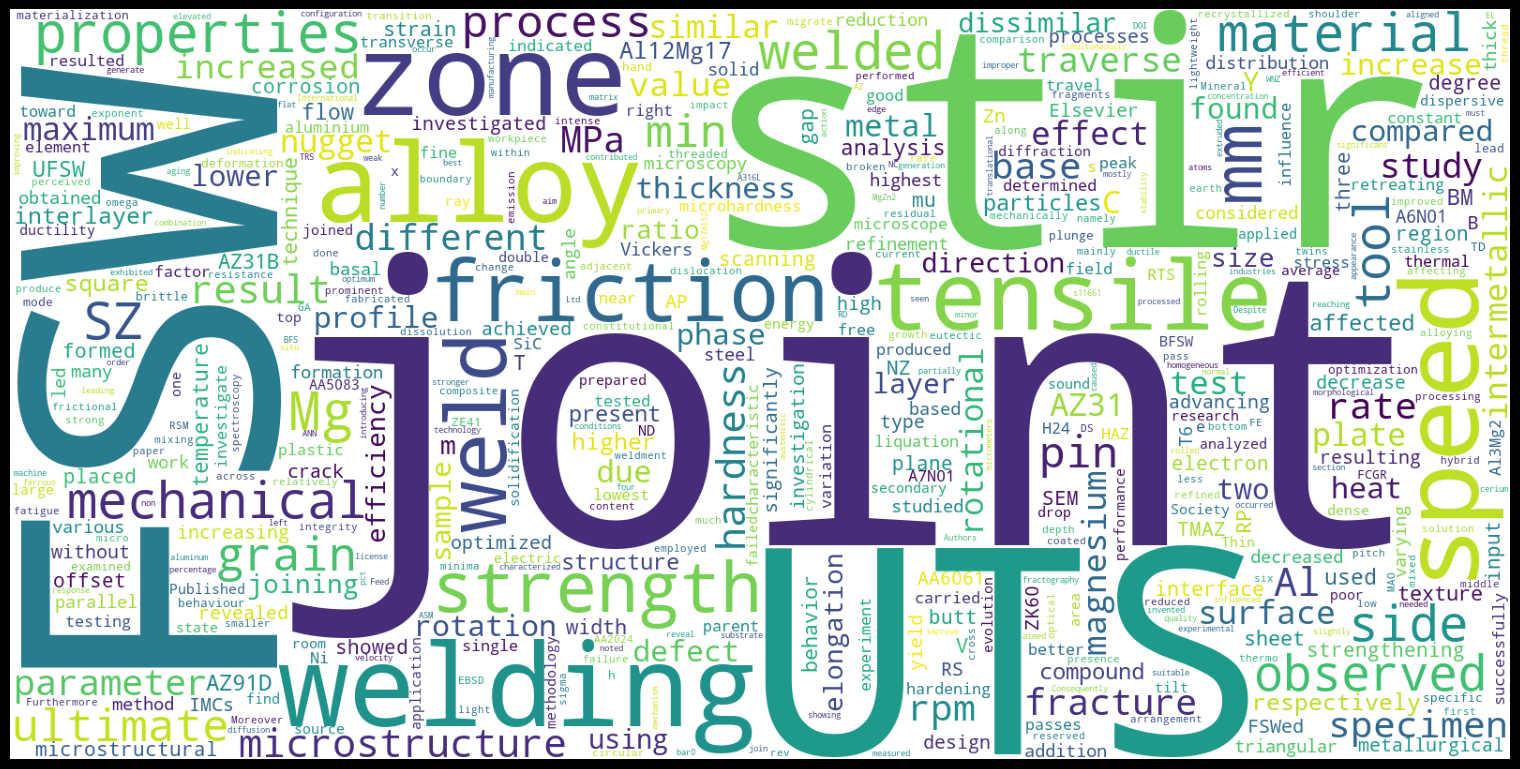

In [23]:
# WordClound from the Abstracts, Title, Authors Keywords or Keywords Plus

# Arguments: antry = 'abs', 'title', 'kwa' or 'kwp'

bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500) 

In [10]:
# Check Table
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+-----------------+------------+
|       Word      | Importance |
+-----------------+------------+
|      joint      |    1.0     |
|       FSW       |   0.8469   |
|       stir      |   0.7143   |
|       UTS       |   0.6735   |
|     welding     |   0.6327   |
|       zone      |   0.6327   |
|      alloy      |   0.5816   |
|      speed      |   0.551    |
|     tensile     |   0.5408   |
|     friction    |    0.5     |
|       weld      |    0.5     |
|     strength    |   0.4592   |
|        mm       |   0.4286   |
|    properties   |   0.4286   |
|        Mg       |   0.4082   |
|     material    |   0.3776   |
|      welded     |   0.3673   |
|    mechanical   |   0.3571   |
|        SZ       |   0.3571   |
|       side      |   0.3469   |
|     observed    |   0.3367   |
|       tool      |   0.3367   |
|      grain      |   0.3163   |
|     ultimate    |   0.2959   |
|     process     |   0.2959   |
|       min       |   0.2959   |
|       pin       |   0.2857   |
|  microst

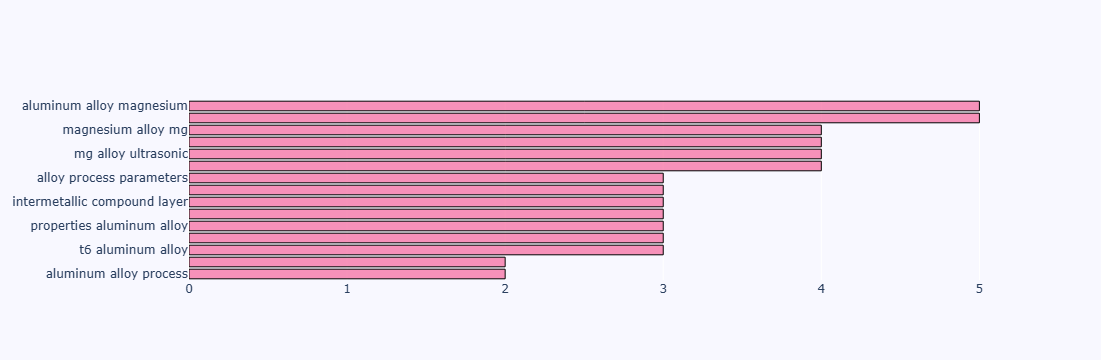

In [25]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Portuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

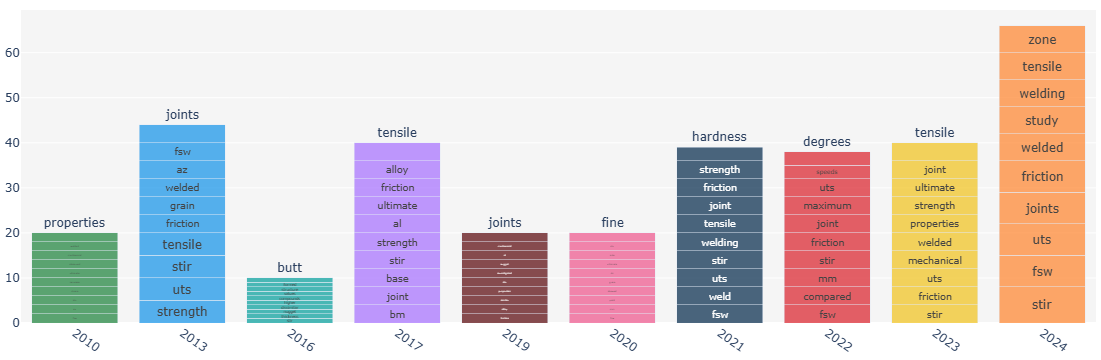

In [33]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            node_labels       = If True, labels appear in nodes
#            node_size         = Node size
#            node_font_size    = Node font size
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
#projection, labels = bibfile.docs_projection(view               = 'notebook',

bibfile.plot_evolution_year(view                               = 'notebook',
                                            #corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             key               = 'abs',
                                             topn              = 10,
                                             txt_font_size     = 12,
                                             start             = 2010,
                                             end               = 2024)
                                            # custom_label      = [],
                                            # custom_projection = [],
                                            # n_components      = 2,
                                            # n_clusters        = 5,
                                            # node_labels       = True,
                                            # node_size         = 12,
                                            # node_font_size    = 5,
                                            # tf_idf            = False,
                                            # embeddings        = False,
                                            # method            = 'umap')

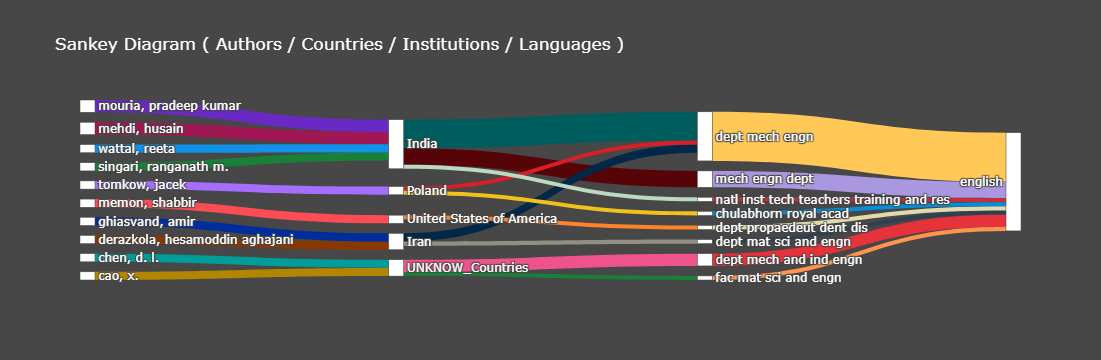

In [35]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

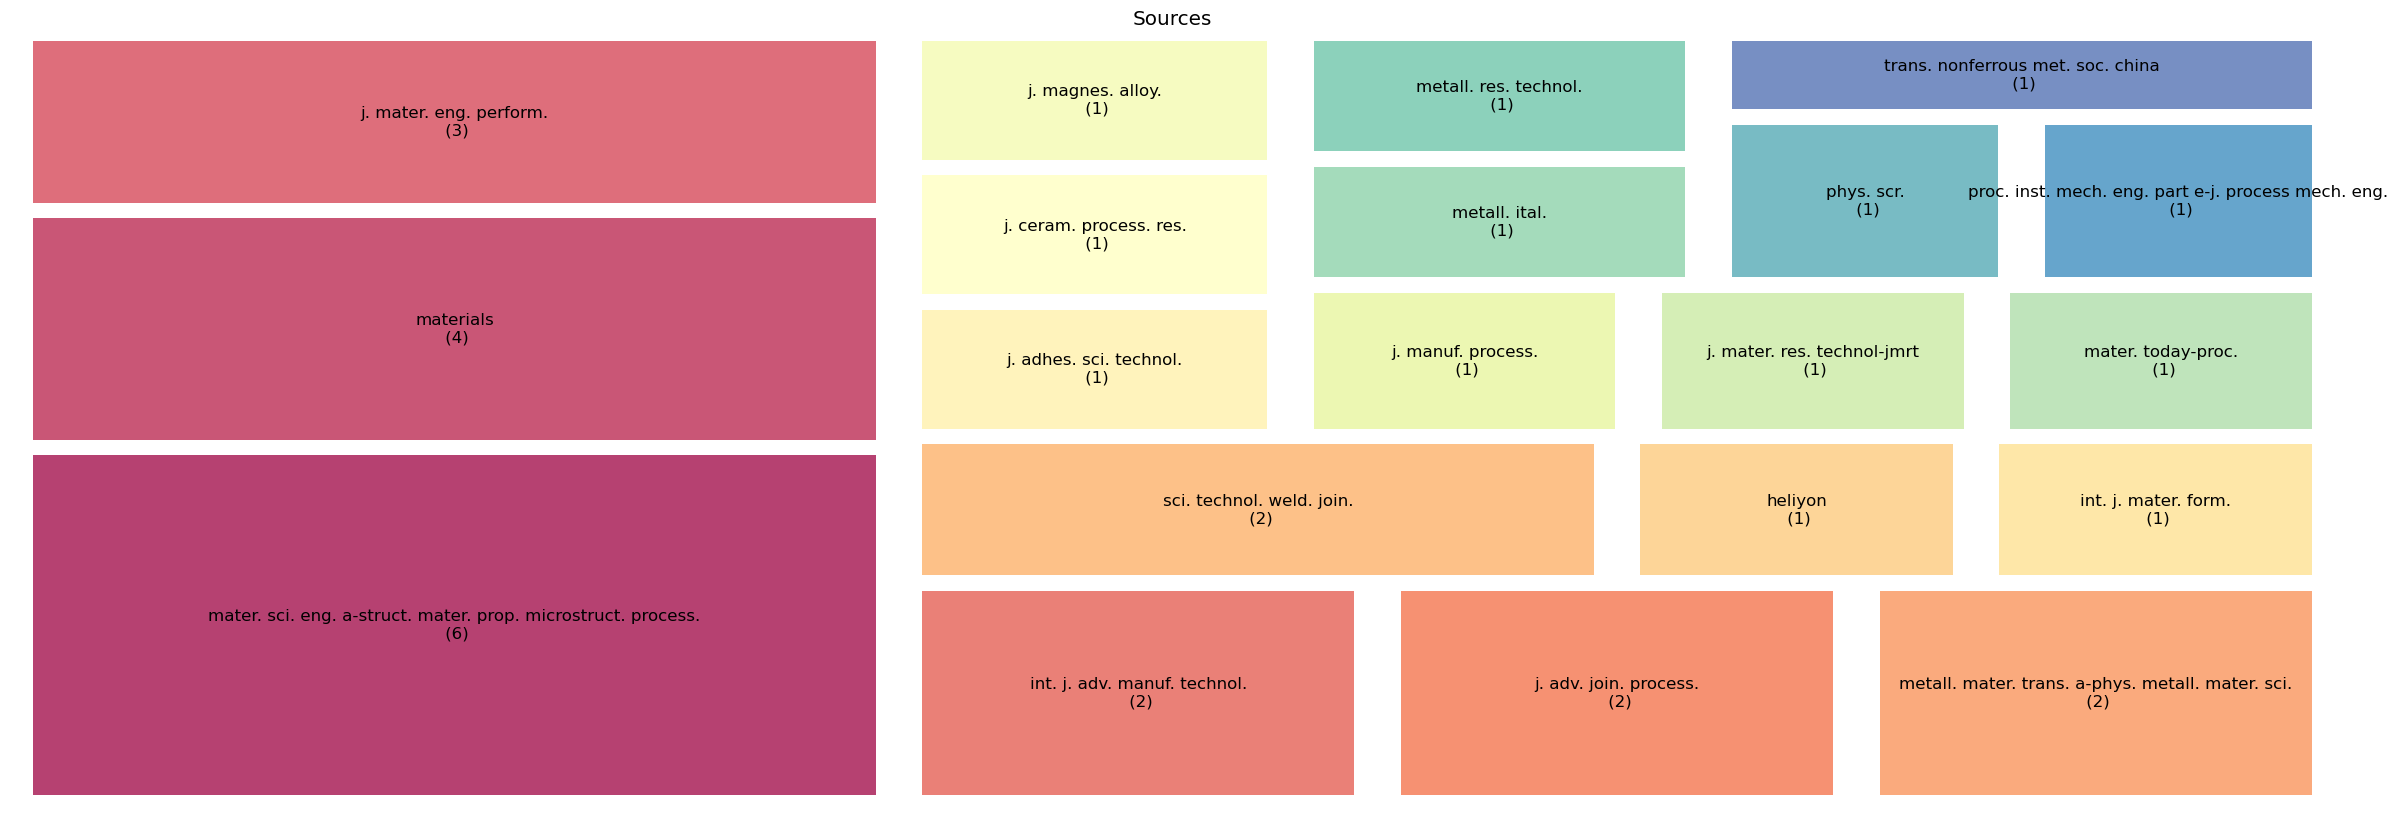

In [37]:
# Tree Map
# Arguments: entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10, txt_font_size = 12)

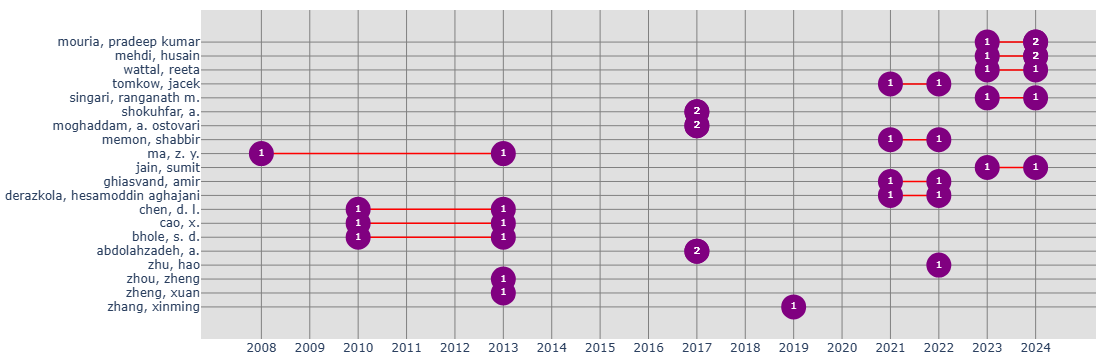

In [39]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

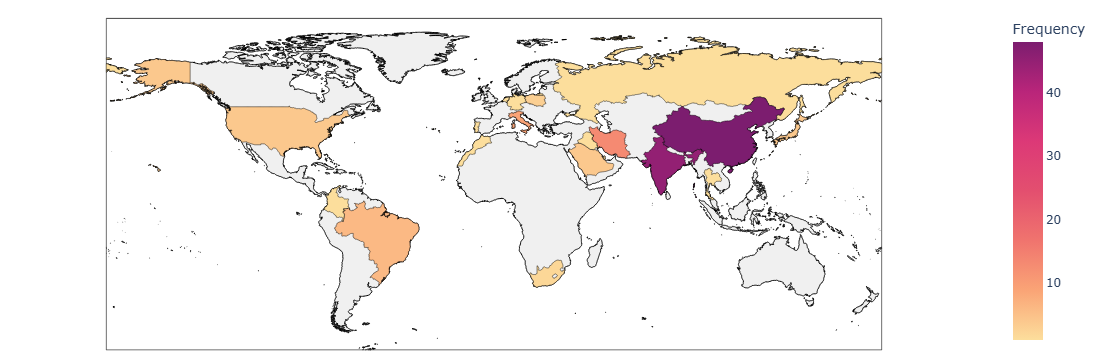

In [43]:
# Countries Productivity Plot (An interactive plot). It informs the production for each Country (count is made considering each doc author)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
bibfile.countries_productivity(view = 'notebook')

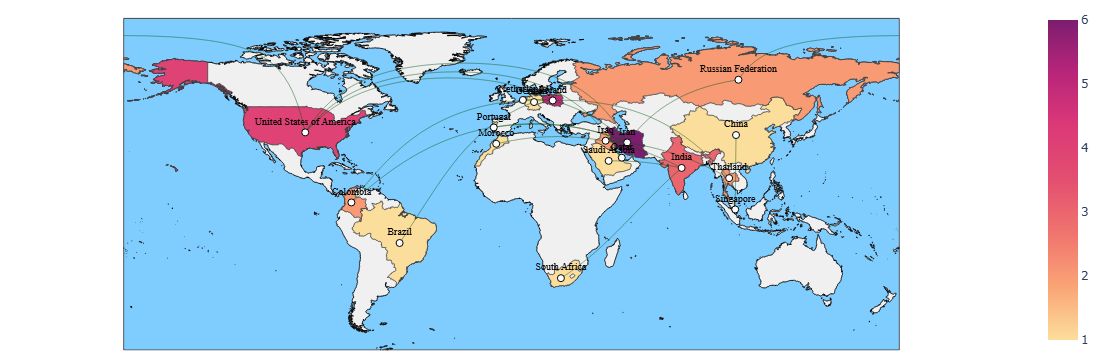

In [59]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

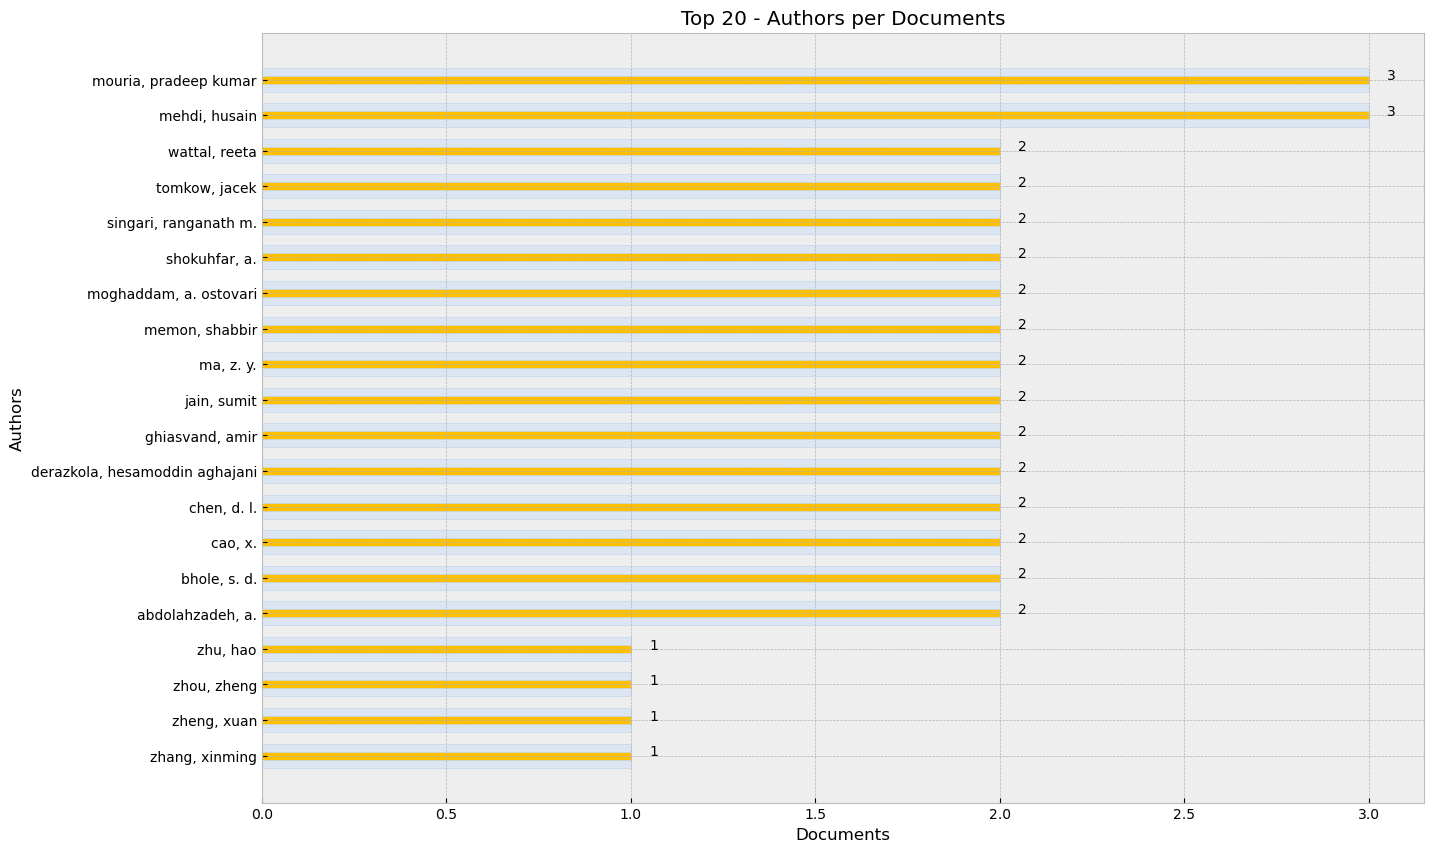

In [45]:
# Bar Plots
# Arguments: statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#            topn      = Total number entities
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

Main Node: mouria, pradeep kumar
Links: ['mishra, subhash', 'singari, ranganath m.', 'singh, joginder']

Main Node: mehdi, husain
Links: ['jain, sumit', 'singh, joginder']

Main Node: wattal, reeta
Links: ['singari, ranganath m.']

Main Node: tomkow, jacek
Links: ['guerrero, john william grimaldo', 'memon, shabbir', 'suksatan, wanich', 'yavari, mohammad mahdi']

Main Node: singari, ranganath m.
Links: ['mouria, pradeep kumar', 'wattal, reeta']

Main Node: shokuhfar, a.
Links: ['abdolahzadeh, a.', 'fallahi, a. a.', 'moghaddam, a. ostovari']

Main Node: moghaddam, a. ostovari
Links: ['abdolahzadeh, a.', 'hatami, m. r.', 'rafiei, r. .', 'shokuhfar, a.']

Main Node: memon, shabbir
Links: ['derazkola, hesamoddin aghajani', 'dorofeev, aleksei', 'tomkow, jacek']

Main Node: ma, z. y.
Links: ['geng, l.', 'ni, d. r.', 'xie, g. m.']

Main Node: jain, sumit
Links: ['mehdi, husain', 'msomi, velaphi', 'salah, abdellah nait']

Main Node: ghiasvand, amir
Links: ['noori, saja mohammed', 'yavari, moham

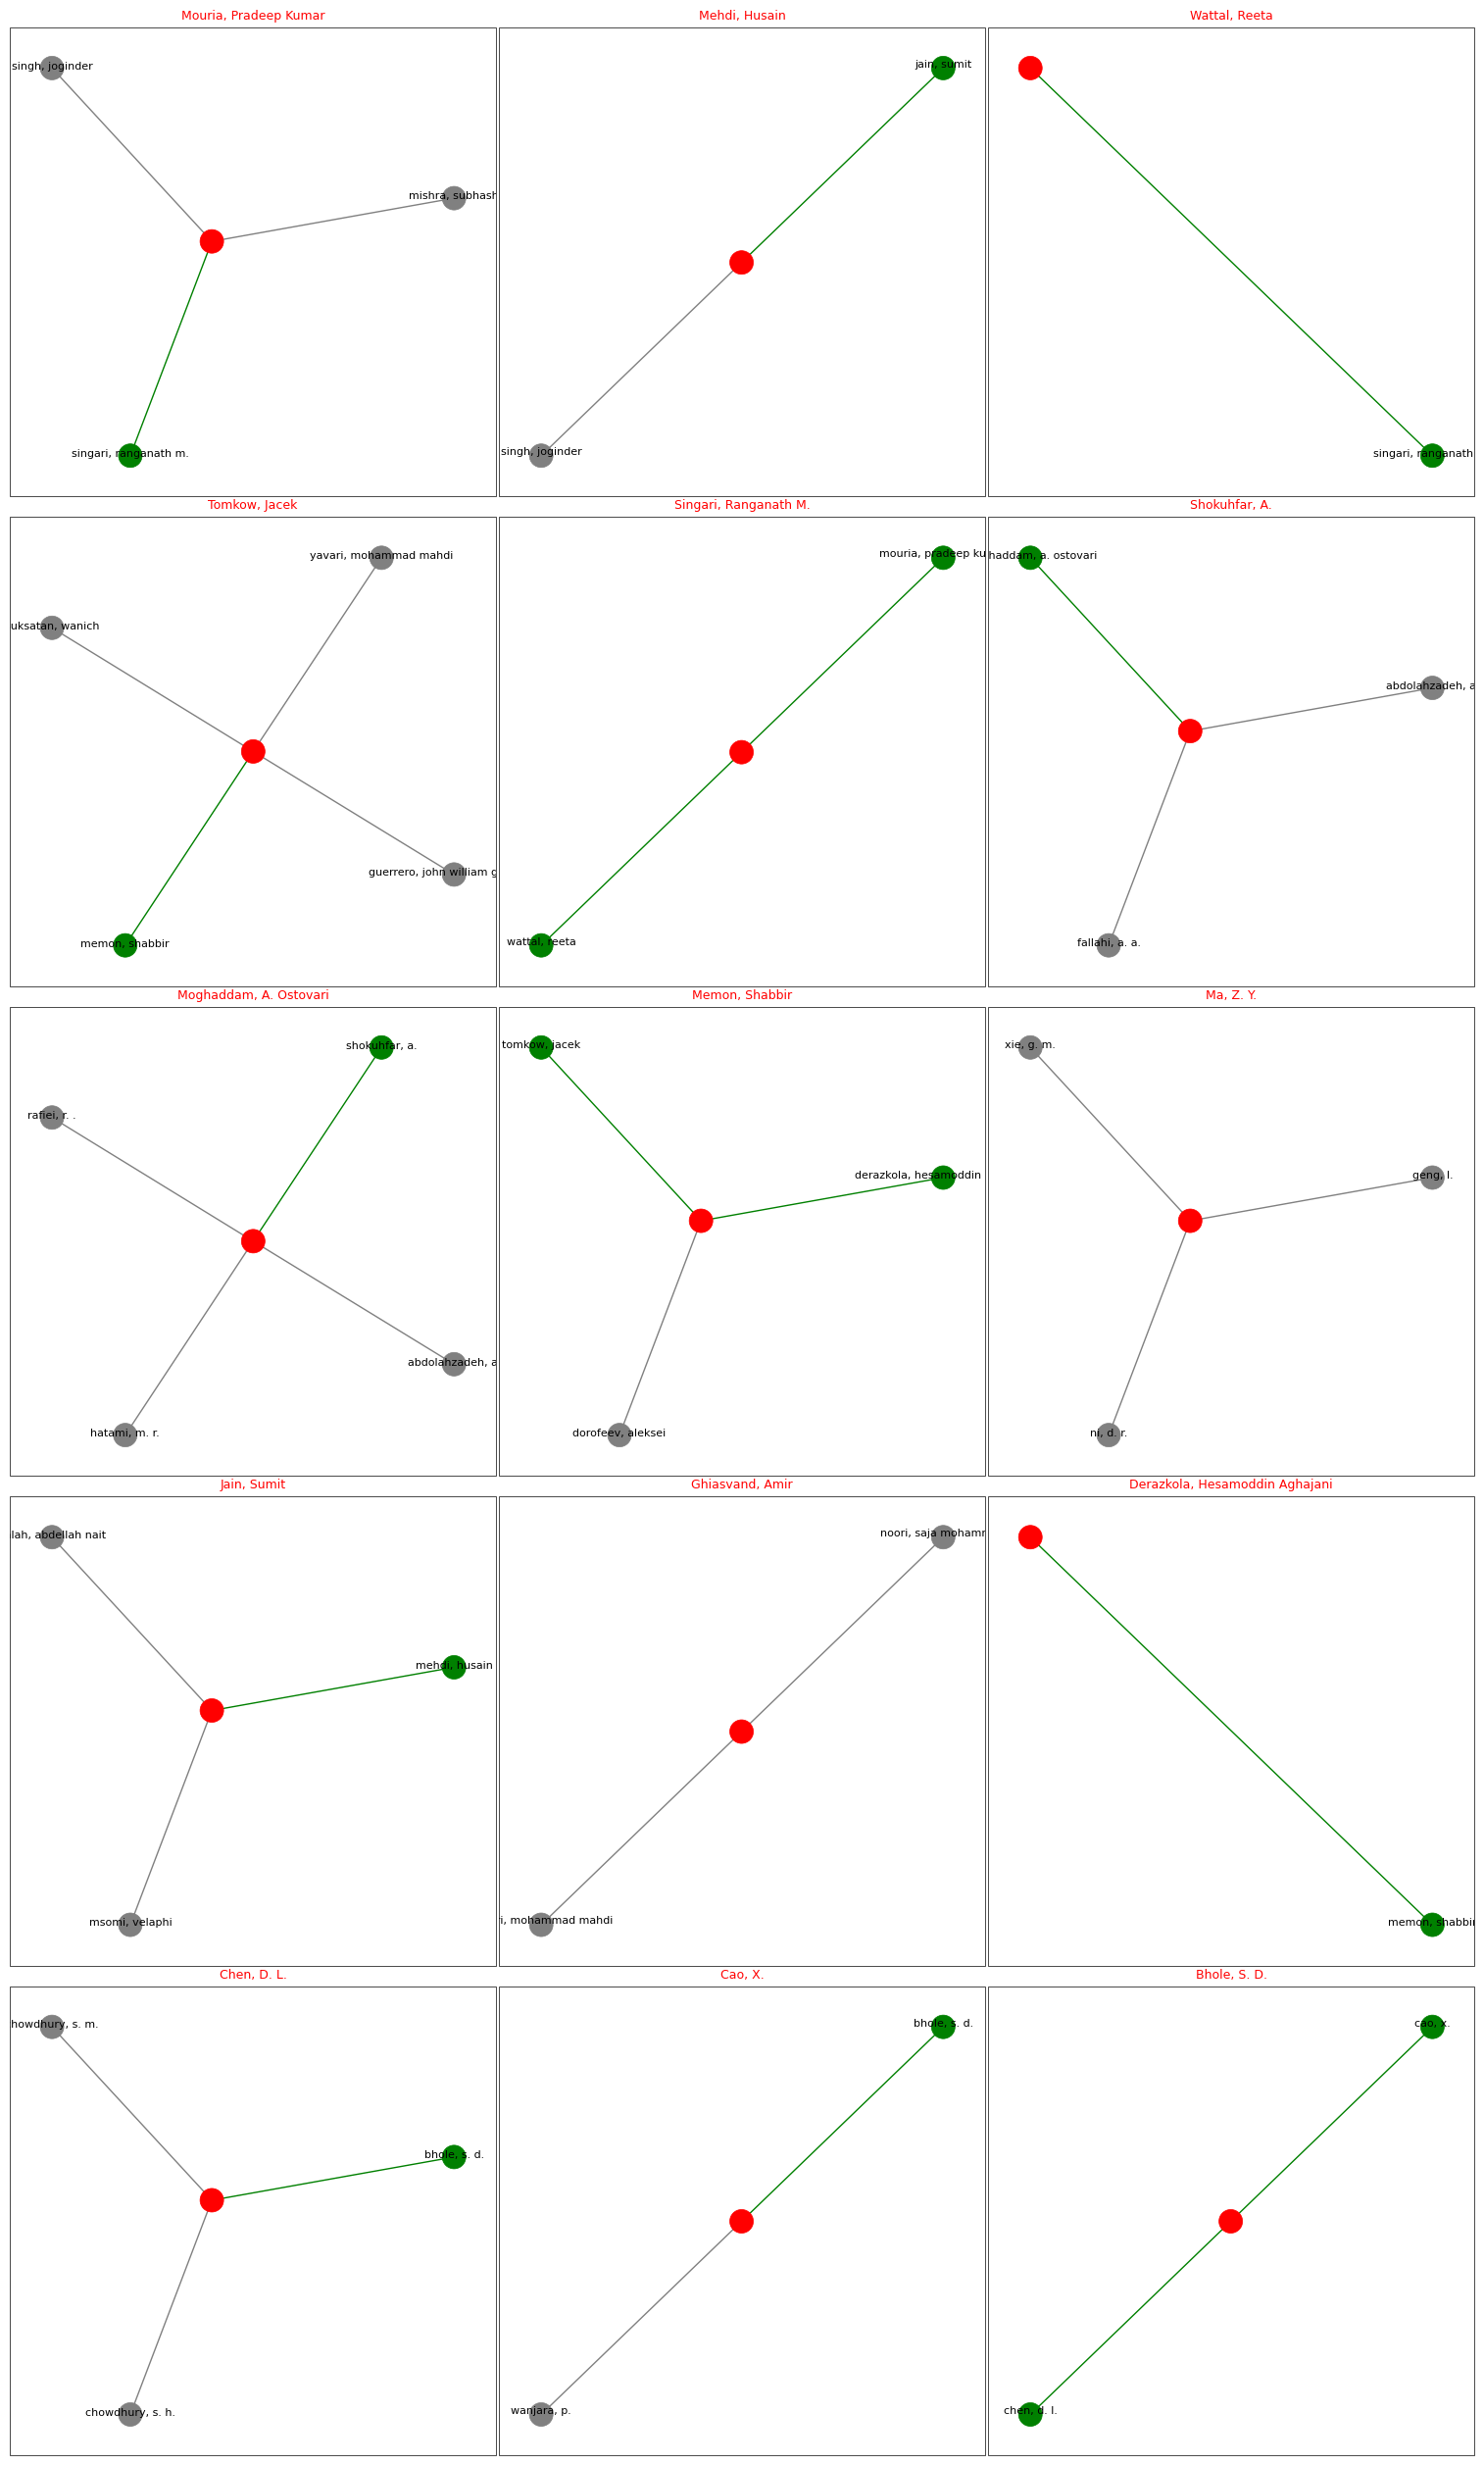

In [49]:
# Arguments:
# entry      = 'aut', 'cout', 'inst', 'kwa', or 'kwp'.
# tgt        = List of specific names.
# topn       = Integer. Specifies the number of top authors to display based on their total contributions.
# rows       = Integer. Defines the number of rows in the subplot grid for the visual layout.
# cols       = Integer. Defines the number of columns in the subplot grid for the visual layout.
# wspace     = Float. Adjusts horizontal spacing between subplots.
# hspace     = Float. Adjusts vertical spacing between subplots.
# tspace     = Float. Sets additional vertical space between nodes and labels for better readability.
# node_size  = Integer. Controls the size of each node in the network graph.
# font_size  = Integer. Defines the font size for node labels.
# pad        = Float. Adjusts padding around the layout for a balanced appearance.
# nd_a       = Color string (e.g., '#FF0000'). Specifies the color for the primary node (main author).
# nd_b       = Color string (e.g., '#008000'). Specifies the color for secondary nodes (authors with significant links).
# nd_c       = Color string (e.g., '#808080'). Specifies the color for other nodes (authors with minor links).
# verbose    = Boolean. If True, prints details of each main node and its connections in the console; if False, suppresses this output.
bibfile.network_collab( entry     = 'aut',
                        tgt       = [],
                        topn      = 15,
                        rows      = 5,
                        cols      = 3,
                        wspace    = 0.2,
                        hspace    = 0.2,
                        tspace    = 0.01,
                        node_size = 300,
                        font_size = 8,
                        pad       = 0.2,
                        nd_a      = '#FF0000',
                        nd_b      = '#008000',
                        nd_c      = '#808080',
                        verbose   = True)

In [51]:
print(bibfile.ask_gpt_ct)

[[['mouria, pradeep kumar'], ['mishra, subhash', 'singari, ranganath m.', 'singh, joginder']], [['mehdi, husain'], ['jain, sumit', 'singh, joginder']], [['wattal, reeta'], ['singari, ranganath m.']], [['tomkow, jacek'], ['guerrero, john william grimaldo', 'memon, shabbir', 'suksatan, wanich', 'yavari, mohammad mahdi']], [['singari, ranganath m.'], ['mouria, pradeep kumar', 'wattal, reeta']], [['shokuhfar, a.'], ['abdolahzadeh, a.', 'fallahi, a. a.', 'moghaddam, a. ostovari']], [['moghaddam, a. ostovari'], ['abdolahzadeh, a.', 'hatami, m. r.', 'rafiei, r. .', 'shokuhfar, a.']], [['memon, shabbir'], ['derazkola, hesamoddin aghajani', 'dorofeev, aleksei', 'tomkow, jacek']], [['ma, z. y.'], ['geng, l.', 'ni, d. r.', 'xie, g. m.']], [['jain, sumit'], ['mehdi, husain', 'msomi, velaphi', 'salah, abdellah nait']], [['ghiasvand, amir'], ['noori, saja mohammed', 'yavari, mohammad mahdi']], [['derazkola, hesamoddin aghajani'], ['memon, shabbir']], [['chen, d. l.'], ['bhole, s. d.', 'chowdhury, s.

In [ ]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [63]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                Name  \
0     -1     37  -1_fsw_stir_uts_mg   

                                      Representation  \
0  [fsw, stir, uts, mg, welding, zone, tensile, j...   

                                 Representative_Docs  
0  [friction stir welding efficient joining proce...  


In [65]:
# Authors Production per Topic
production_topics = bibfile.topics_authors(topn = 15)
production_topics

,-1,Total
"mouria, pradeep kumar",3,3
"mehdi, husain",3,3
"wattal, reeta",2,2
"tomkow, jacek",2,2
"singari, ranganath m.",2,2
"shokuhfar, a.",2,2
"moghaddam, a. ostovari",2,2
"memon, shabbir",2,2
"ma, z. y.",2,2
"jain, sumit",2,2


In [67]:
# NLP
# Each document Topic
topics = bibfile.topics

In [69]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

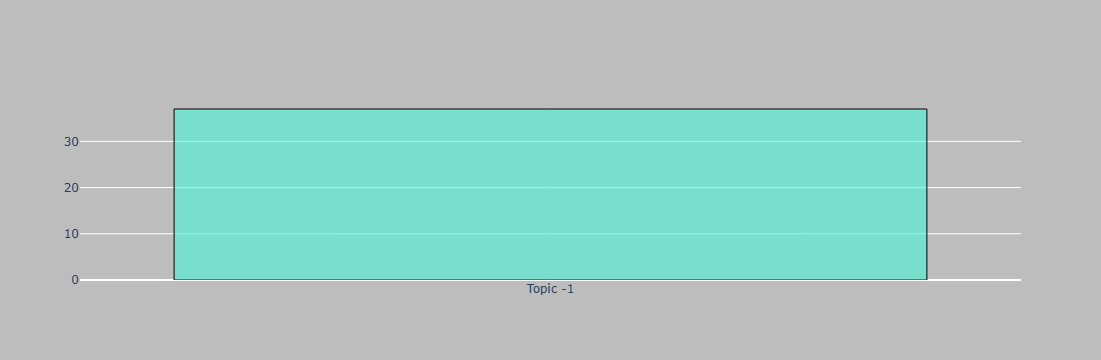

In [71]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

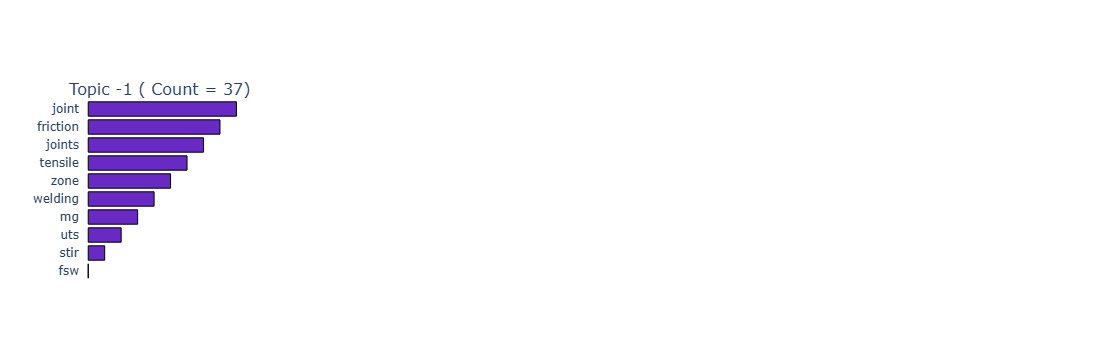

In [73]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

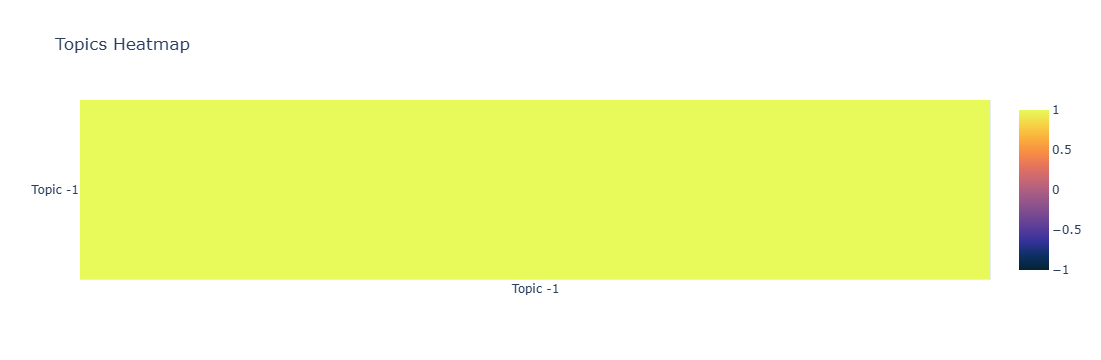

In [81]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [85]:
# NLP
bibfile.topics_representatives()

,Topic,Docs
0,-1.0,


In [87]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  -1 Correlation:  -0.067


In [91]:
# W2V
model, corpus, w_emb, vocab = bibfile.word_embeddings(stop_words        = ['en'],
                                                      lowercase         = True,
                                                      rmv_accents       = True,
                                                      rmv_special_chars = False,
                                                      rmv_numbers       = True,
                                                      rmv_custom_words  = [],
                                                      vector_size       = 100,
                                                      window            = 5,
                                                      min_count         = 1,
                                                      epochs            = 10)

In [93]:
# W2V - Similarity
similarity = bibfile.word_embeddings_sim(model, word_1 = 'mcda', word_2 = 'risk')
similarity

0.05864626

In [95]:
# W2V - Find Docs
results = bibfile.word_embeddings_find_doc(corpus, target_words = ['mcda', 'risk'])
results

[]

In [97]:
# W2V - Operations
operations = bibfile.word_embeddings_operations(model, positive = ['mcda', 'group'], negative = ['risk'], topn = 10)
operations

[('am', 0.12944726645946503),
 ('it', 0.12077941000461578),
 ('wt', 0.08544164896011353),
 ('cc', 0.08106458932161331),
 ('nc', 0.07385024428367615),
 ('xrd', 0.06754288822412491),
 ('ebsd', 0.0596383661031723),
 ('org', 0.058618124574422836),
 ('hv', 0.058333612978458405),
 ('gamma', 0.05826256051659584)]

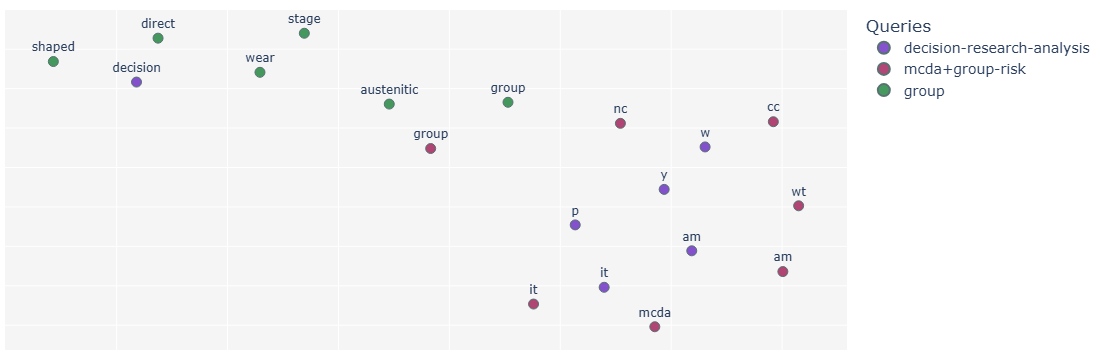

In [99]:
# W2V - Operations Plot.
bibfile.plot_word_embeddings(model,
                             view      = 'notebook',
                             positive  = [ ['mcda', 'group'], ['decision'],             ['group']],
                             negative  = [ ['risk'],          ['research', 'analysis'], []       ],
                             topn      = 5,
                             node_size = 10,
                             font_size = 14)

In [111]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

A Total of 37 Documents Remains

Article = 31
Article in Press = 3
Proceedings Paper = 3


In [ ]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')